In [93]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## a) load/merge data and visualize logerror

In [164]:
# load data into DataFrames
train = pd.read_csv('./p1_data/train.csv')
properties = pd.read_csv('./p1_data/properties.csv')

df = train.merge(properties, on='id')
df

,id,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,14366692,-0.1684,1/1/16,NaN,NaN,NaN,3.5,4.0,NaN,NaN,...,NaN,NaN,346458.0,585529.0,2015,239071.0,10153.02,NaN,NaN,NaN
1,14739064,-0.0030,1/2/16,NaN,NaN,NaN,1.0,2.0,NaN,NaN,...,NaN,NaN,66834.0,210064.0,2015,143230.0,2172.88,NaN,NaN,6.059040e+13
2,10854446,0.3825,1/3/16,NaN,NaN,NaN,2.0,2.0,NaN,7.0,...,NaN,NaN,55396.0,105954.0,2015,50558.0,1443.69,NaN,NaN,6.037140e+13
3,11672170,-0.0161,1/3/16,1.0,NaN,NaN,4.0,5.0,NaN,1.0,...,NaN,NaN,559040.0,1090127.0,2015,531087.0,13428.94,NaN,NaN,6.037260e+13
4,12524288,-0.0419,1/3/16,NaN,NaN,NaN,1.0,1.0,NaN,7.0,...,NaN,NaN,56233.0,70316.0,2015,14083.0,913.17,NaN,NaN,6.037570e+13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31720,12756771,0.0658,12/30/16,NaN,NaN,NaN,1.0,3.0,NaN,7.0,...,NaN,NaN,65728.0,307167.0,2015,241439.0,4038.70,NaN,NaN,6.037550e+13
31721,11295458,-0.0294,12/30/16,1.0,NaN,NaN,2.0,2.0,NaN,7.0,...,NaN,NaN,40163.0,50203.0,2015,10040.0,1263.39,Y,15.0,6.037900e+13
31722,11308315,0.0070,12/30/16,1.0,NaN,NaN,3.0,5.0,NaN,4.0,...,NaN,NaN,248378.0,331525.0,2015,83147.0,6461.79,NaN,NaN,6.037900e+13
31723,11703478,0.0431,12/30/16,NaN,NaN,NaN,1.0,3.0,NaN,7.0,...,NaN,NaN,17520.0,39934.0,2015,22414.0,627.91,NaN,NaN,6.037230e+13


In [165]:
np.percentile(df.logerror, 0)

-2.365

In [166]:
df.buildingclasstypeid.mean()

4.0

In [167]:
# eliminate outliers

df.loc[df["logerror"] <= np.percentile(df.logerror, 1), "logerror"] = np.percentile(df.logerror, 1)
df.loc[df["logerror"] >= np.percentile(df.logerror, 99), "logerror"] = np.percentile(df.logerror, 99)


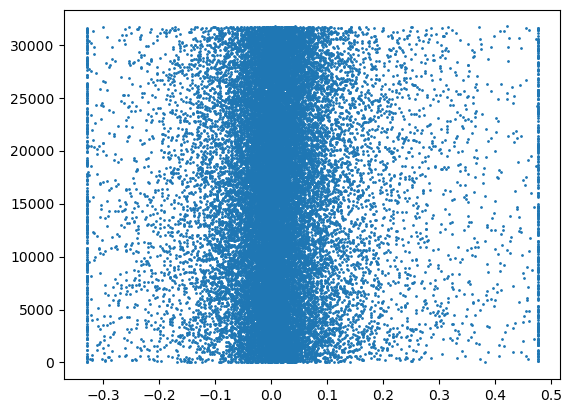

In [168]:
# scatter of logerr

plt.scatter(df.logerror, df.index, s=1)
plt.show()

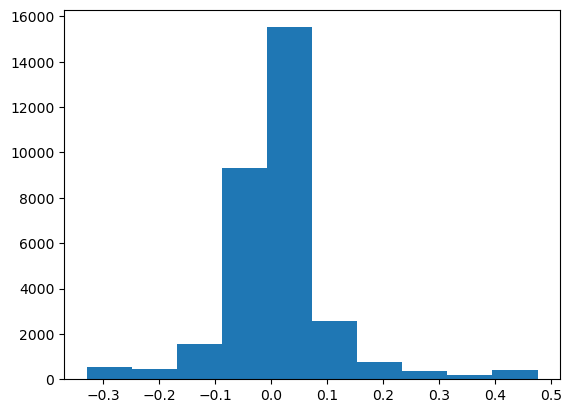

In [169]:
# histogram of logerr
plt.hist(df.logerror)
plt.show()

## b) data cleaning

In [170]:
# build new data frame
count = [df[c].isna().sum() for c in df.columns]
missing = pd.DataFrame({'column_name':df.columns, 'missing_count': count})

missing['missing_ratio'] = [missing.missing_count[i]/len(df) for i in range(len(missing))]

In [184]:
missing

,column_name,missing_count,missing_ratio
0,id,0,0.000000
1,logerror,0,0.000000
2,transactiondate,0,0.000000
3,airconditioningtypeid,21563,0.679685
4,architecturalstyletypeid,31628,0.996942
5,basementsqft,31711,0.999559
6,bathroomcnt,0,0.000000
7,bedroomcnt,0,0.000000
8,buildingclasstypeid,31717,0.999748
9,buildingqualitytypeid,11488,0.362112


In [176]:
# fill missing data
df = df.fillna(df.select_dtypes('number').mean())

## c) univariate analysis

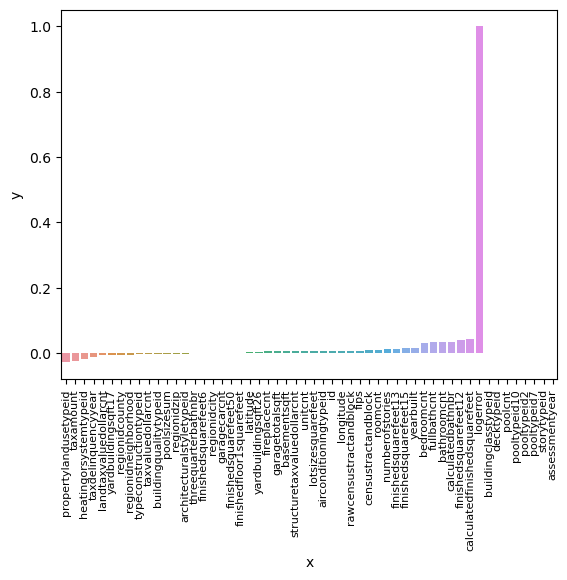

In [178]:
# make bar chart
corr = pd.DataFrame({'x':df.select_dtypes('number').columns ,'y':[df['logerror'].corr(df[c]) for c in df.select_dtypes('number').columns]})
corr = corr.sort_values('y')

# sns.barplot(x = df.select_dtypes('number').columns, y = corr)
sns.barplot(x = corr.x, y = corr.y)
locs, labels = plt.xticks()
plt.xticks(locs, labels = labels, rotation = 'vertical', fontsize = 8)
plt.show()

In [179]:
df.buildingclasstypeid.std()

0.0

# explain reason

The variables at the far right of the barplot have no correlation value. This happens because of how the correlation coefficient is calculated, it includes a division by the standard deviation of the variables that it is comparing. If one of the variables has no standard deviation (all values are the same), then that would give a division by zero, so no value is obtained.


## d) non-linear regression model

In [180]:
# drop categorical features 
# ("hashottuborspa", "propertycountylandusecode", "propertyzoningdesc", "fireplaceflag", "taxdelinquencyflag") 
# drop "id" and "transactiondate"
to_drop = ["hashottuborspa", "propertycountylandusecode", "propertyzoningdesc", "fireplaceflag", "taxdelinquencyflag", "id", "transactiondate"]
df = df.drop(columns = to_drop)

In [189]:
# split and train
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import normalize


x_train, x_test, y_train, y_test = train_test_split(df.iloc[:,1:], df.iloc[:,0], test_size = 0.3, random_state = 30)

x_train = normalize(x_train)
x_test = normalize(x_test)

In [191]:
regr = MLPRegressor().fit(x_train, y_train)
y_hat = regr.predict(x_test)

In [193]:
# report importances and mse

from sklearn.metrics import mean_squared_error


mse = mean_squared_error(y_test, y_hat)
print("The MSE of the non-linear regressor model is: ", mse)

The MSE of the non-linear regressor model is:  0.010179118026994059
